## Import the packages

In [ ]:
# Import packages 
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

## read Julio files and select the level "ilev"

Julio wanted to use ilev = 29

``this is a quote``

In [ ]:
# read files at one level ilev
ilev = 29
indir='/glade/work/juliob/myPythonTools/SAMwrf/'
infile=indir+'SAMwrf_latlon_timeavg_CORR_UTN_UTGW.nc'
ds = xr.open_dataset(infile)
var = ds.CORR_UTN_UTGW.isel(lev=ilev)

## First quick plot 
We save the plot in a png file but it can also be copied from the notebook directly and copied in a powerpoint or in an email. Convenient beyond png...

In [ ]:
# quick plot 
clevs=np.linspace(-1.,1.,num=41)
print(clevs)
cmap = plt.cm.bwr
fig = plt.figure(figsize=(12, 9))
ax1 = fig.add_subplot(2, 1, 1, projection=ccrs.PlateCarree(central_longitude=0))
#cf = ax1.pcolormesh(var.lon, var.lat, var, cmap=plt.cm.jet, transform=ccrs.PlateCarree())
#cf = ax1.contourf(var.lon, var.lat, var,  levels=clevs, cmap=cmap, transform=ccrs.PlateCarree())
cf = ax1.pcolormesh(var.lon, var.lat, var, cmap=cmap,  norm=mpl.colors.BoundaryNorm(clevs, ncolors=cmap.N), transform=ccrs.PlateCarree())
ax1.coastlines(resolution='110m')
ax1.gridlines(linestyle=':', color='black')
plt.colorbar(cf)

ax1 = fig.add_subplot(2, 1, 2, projection=ccrs.PlateCarree(central_longitude=0))
#cf = ax1.pcolormesh(var.lon, var.lat, var, cmap=plt.cm.jet, transform=ccrs.PlateCarree())
cf = ax1.contourf(var.lon, var.lat, var,  levels=clevs, cmap=cmap, transform=ccrs.PlateCarree())
#cf = ax1.pcolormesh(var.lon, var.lat, var, cmap=cmap,  norm=mpl.colors.BoundaryNorm(clevs, ncolors=cmap.N), transform=ccrs.PlateCarree())
ax1.coastlines(resolution='110m')
ax1.gridlines(linestyle=':', color='black')
plt.colorbar(cf)

plt.show()
# save plot
#plt.savefig('/glade/scratch/juliob/CORR_UTN_UTGW.png', dpi=600, facecolor='w', edgecolor='w', orientation='portrait')

## Vector plot

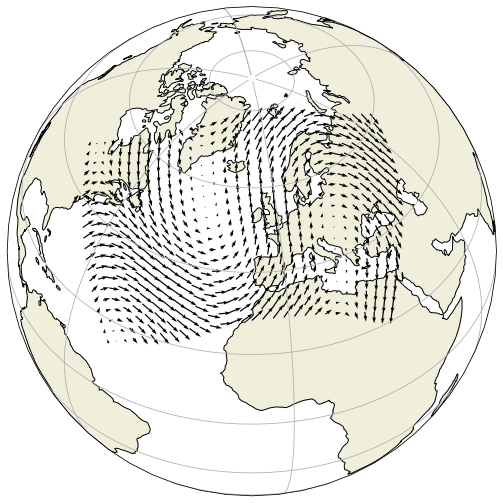

In [52]:
shape=(20,30)
crs = ccrs.RotatedPole(pole_longitude=177.5, pole_latitude=37.5)

x = np.linspace(311.9, 391.1, shape[1])
y = np.linspace(-23.6, 24.8, shape[0])

x2d, y2d = np.meshgrid(x, y)
u = 10 * (2 * np.cos(2 * np.deg2rad(x2d) + 3 * np.deg2rad(y2d + 30)) ** 2)
v = 20 * np.cos(6 * np.deg2rad(x2d))

fig = plt.figure(figsize=(12, 9))

ax = plt.axes(projection=ccrs.Orthographic(-10, 45))

#ax.add_feature(cartopy.feature.OCEAN, zorder=0)
ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')

ax.set_global()
ax.gridlines()

ax.quiver(x, y, u, v, transform=crs)

plt.show()



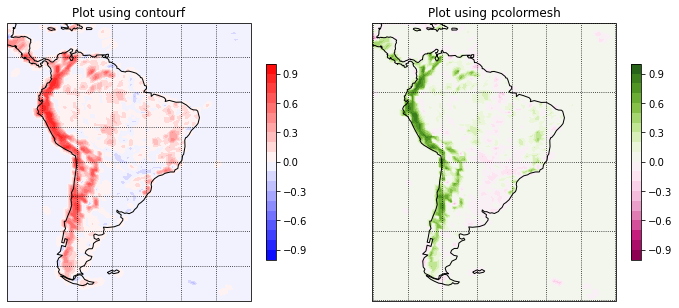

In [58]:
# specific contour levels 
[cmin, cmax, dcontour] = [-1., 1.1, 0.1] 
clevs = np.arange(cmin, cmax, dcontour)

clevs=np.linspace(-1.,1.,num=21)
# cmap
cmap = plt.cm.bwr

fig = plt.figure(figsize=(12, 9))
ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree(central_longitude=0))
cf = ax1.contourf(var.lon, var.lat, var, levels=clevs, cmap=cmap, transform=ccrs.PlateCarree())
ax1.coastlines(resolution='110m')
ax1.gridlines(linestyle=':', color='black')
ax1.set_title("Plot using contourf",fontsize=12, loc='center')
plt.colorbar(cf,  shrink=0.4)

cmap = plt.cm.PiYG

ax1 = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree(central_longitude=0))
cf = ax1.pcolormesh(var.lon, var.lat, var, cmap=cmap,  norm=mpl.colors.BoundaryNorm(clevs, ncolors=cmap.N), transform=ccrs.PlateCarree())
ax1.coastlines(resolution='110m')
ax1.gridlines(linestyle=':', color='black')
ax1.set_title("Plot using pcolormesh",fontsize=12, loc='center')
plt.colorbar(cf,  shrink=0.4)


# save plot
#plt.savefig('/glade/scratch/hannay/CORR_UTN_UTGW.png', dpi=600, facecolor='w', edgecolor='w', orientation='portrait')

In [ ]:
# specific contour levels 
[cmin, cmax, dcontour] = [-1., 1.1, 0.1] 
clevs = np.arange(cmin, cmax, dcontour)

# cmap
cmap = plt.cm.bwr

fig = plt.figure(figsize=(12, 9))
ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree(central_longitude=0))
cf = ax1.contourf(var.lon, var.lat, var,  clevs, cmap=cmap, transform=ccrs.PlateCarree())
ax1.coastlines(resolution='110m')
ax1.gridlines(linestyle=':', color='black')
ax1.set_title("Plot using contourf",fontsize=12, loc='center')
plt.colorbar(cf,  shrink=0.4)

cmap = plt.cm.PiYG

ax1 = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree(central_longitude=0))
cf = ax1.pcolormesh(var.lon, var.lat, var, cmap=cmap,  norm=mpl.colors.BoundaryNorm(clevs, ncolors=cmap.N), transform=ccrs.PlateCarree())
ax1.coastlines(resolution='110m')
ax1.gridlines(linestyle=':', color='black')
ax1.set_title("Plot using pcolormesh",fontsize=12, loc='center')
plt.colorbar(cf,  shrink=0.4)


# save plot
plt.savefig('/glade/scratch/hannay/CORR_UTN_UTGW.png', dpi=600, facecolor='w', edgecolor='w', orientation='portrait')

In [ ]:
# specific contour levels 
[cmin, cmax, dcontour] = [-1., 1.1, 0.1] 
clevs = np.arange(cmin, cmax, dcontour)

# cmap
cmap = plt.cm.bwr

fig = plt.figure(figsize=(12, 9))
ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree(central_longitude=0))
cf = ax1.contourf(var.lon, var.lat, var,  clevs, cmap=cmap, transform=ccrs.PlateCarree())
ax1.coastlines(resolution='110m')
ax1.gridlines(linestyle=':', color='black')
ax1.set_title("Plot using contourf",fontsize=12, loc='center')
plt.colorbar(cf,  shrink=0.4)

cmap = plt.cm.PiYG

ax1 = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree(central_longitude=0))
cf = ax1.pcolormesh(var.lon, var.lat, var, cmap=cmap,  norm=mpl.colors.BoundaryNorm(clevs, ncolors=cmap.N), transform=ccrs.PlateCarree())
ax1.coastlines(resolution='110m')
ax1.gridlines(linestyle=':', color='black')
ax1.set_title("Plot using pcolormesh",fontsize=12, loc='center')
plt.colorbar(cf,  shrink=0.4)


# save plot
plt.savefig('/glade/scratch/hannay/CORR_UTN_UTGW.png', dpi=600, facecolor='w', edgecolor='w', orientation='portrait')

## Make the plot global

I am just playing around to show the option

In [ ]:
# Let's let at the plot in a global map for fun 
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=0))
cf = ax1.pcolormesh(var.lon, var.lat, var, cmap=plt.cm.jet, transform=ccrs.PlateCarree())
ax1.coastlines(resolution='110m')
ax1.gridlines(linestyle=':', color='black')
ax1.set_global()
plt.colorbar(cf, shrink=0.5)

# save plot
plt.savefig('/glade/scratch/juliob/CORR_UTN_UTGW.png', dpi=600, facecolor='w', edgecolor='w', orientation='portrait')

## Subplots and different projections

Here is to demonstrate how to add several subplots. 

I am also doing different projections. There are more. 

In [ ]:

fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree(central_longitude=0))
cf = ax1.pcolormesh(var.lon, var.lat, var, cmap=plt.cm.jet, transform=ccrs.PlateCarree())
ax1.coastlines(resolution='110m')
ax1.gridlines(linestyle=':', color='black')
plt.colorbar(cf, shrink=0.5)
ax1.set_global()

ax2 = fig.add_subplot(2, 2, 2, projection=ccrs.Robinson(central_longitude=0))
cf = ax2.pcolormesh(var.lon, var.lat, var, cmap=plt.cm.jet, transform=ccrs.PlateCarree())
ax2.coastlines(resolution='110m')
ax2.gridlines(linestyle=':', color='black')
plt.colorbar(cf, shrink=0.5)
ax2.set_global()

ax2 = fig.add_subplot(2, 2, 3, projection=ccrs.Robinson(central_longitude=-60))
cf = ax2.pcolormesh(var.lon, var.lat, var, cmap=plt.cm.jet, transform=ccrs.PlateCarree())
ax2.coastlines(resolution='110m')
ax2.gridlines(linestyle=':', color='black')
plt.colorbar(cf, shrink=0.5)
ax2.set_global()


# save plot
plt.savefig('/glade/scratch/juliob/CORR_UTN_UTGW-2.png', dpi=600, facecolor='w', edgecolor='w', orientation='portrait')

## Colormaps 

Many examples of can be find here (https://matplotlib.org/stable/tutorials/colors/colormaps.html)

In [ ]:
# change the colormap 
# remove the grid lines

cmap = plt.cm.bwr

fig = plt.figure(figsize=(12, 9))
ax1 = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=0))
cf = ax1.pcolormesh(var.lon, var.lat, var, cmap=cmap, transform=ccrs.PlateCarree())
ax1.coastlines(resolution='110m')
#ax1.gridlines(linestyle=':', color='black')
plt.colorbar(cf)

# save plot
plt.savefig('/glade/scratch/juliob/CORR_UTN_UTGW.png', dpi=600, facecolor='w', edgecolor='w', 
            orientation='portrait')

In [ ]:
# more color maps

fig = plt.figure(figsize=(12, 9))

cmap = plt.cm.tab20c
ax1 = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree(central_longitude=0))
cf = ax1.pcolormesh(var.lon, var.lat, var, cmap=cmap, transform=ccrs.PlateCarree())
ax1.coastlines(resolution='110m')
ax1.gridlines(linestyle=':', color='black')
plt.colorbar(cf)

cmap = plt.cm.inferno  
ax1 = fig.add_subplot(2, 2, 2, projection=ccrs.PlateCarree(central_longitude=0))
cf = ax1.pcolormesh(var.lon, var.lat, var, cmap=cmap, transform=ccrs.PlateCarree())
ax1.coastlines(resolution='110m')
ax1.gridlines(linestyle=':', color='black')
plt.colorbar(cf)

cmap = plt.cm.gist_earth
ax1 = fig.add_subplot(2, 2, 3, projection=ccrs.PlateCarree(central_longitude=0))
cf = ax1.pcolormesh(var.lon, var.lat, var, cmap=cmap, transform=ccrs.PlateCarree())
ax1.coastlines(resolution='110m')
ax1.gridlines(linestyle=':', color='black')
plt.colorbar(cf)

cmap = plt.cm.YlOrRd   
ax1 = fig.add_subplot(2, 2, 4, projection=ccrs.PlateCarree(central_longitude=0))
cf = ax1.pcolormesh(var.lon, var.lat, var, cmap=cmap, transform=ccrs.PlateCarree())
ax1.coastlines(resolution='110m')
ax1.gridlines(linestyle=':', color='black')
plt.colorbar(cf)


# save plot
plt.savefig('/glade/scratch/hannay/CORR_UTN_UTGW.png', dpi=600, facecolor='w', edgecolor='w', 
            orientation='portrait')

## use contourf versus mesh + shrinking of colorbar

I don't understand well teh differences yet but sometimes you cannot use mesh if you turned you xarray into array

In [ ]:
# use contourf instead of mesh

fig = plt.figure(figsize=(12, 9))

cmap = plt.cm.gist_earth

ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree(central_longitude=0))
cf = ax1.contourf(var.lon, var.lat, var, cmap=cmap, transform=ccrs.PlateCarree())
ax1.coastlines(resolution='110m')
ax1.gridlines(linestyle=':', color='black')
plt.colorbar(cf,  shrink=0.6)

ax1 = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree(central_longitude=0))
cf = ax1.pcolormesh(var.lon, var.lat, var, cmap=cmap, transform=ccrs.PlateCarree())
ax1.coastlines(resolution='110m')
ax1.gridlines(linestyle=':', color='black')
plt.colorbar(cf,  shrink=0.4)

# save plot
plt.savefig('/glade/scratch/hannay/CORR_UTN_UTGW.png', dpi=600, facecolor='w', edgecolor='w', orientation='portrait')

## zooming + adding a title

In [ ]:
#  add a title and zoom on a region
cmap = plt.cm.tab20c
fig = plt.figure(figsize=(12, 9))
ax1 = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=0))
cf = ax1.contourf(var.lon, var.lat, var, cmap=cmap, transform=ccrs.PlateCarree())
ax1.coastlines(resolution='110m')
ax1.gridlines(linestyle=':', color='black')
ax1.set_title("Plot of South America",fontsize=12, loc='center')
ax1.set_xlim(-90,-60)
ax1.set_ylim(-60,0)
plt.colorbar(cf)

# save plot
plt.savefig('/glade/scratch/hannay/CORR_UTN_UTGW.png', dpi=600, facecolor='w', edgecolor='w', orientation='portrait')

## Add specification of contour levels

In [ ]:
# specific contour levels 
[cmin, cmax, dcontour] = [-1., 1.1, 0.1] 
clevs = np.arange(cmin, cmax, dcontour)

# cmap
cmap = plt.cm.bwr

fig = plt.figure(figsize=(12, 9))
ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree(central_longitude=0))
cf = ax1.contourf(var.lon, var.lat, var,  clevs, cmap=cmap, transform=ccrs.PlateCarree())
ax1.coastlines(resolution='110m')
ax1.gridlines(linestyle=':', color='black')
ax1.set_title("Plot using contourf",fontsize=12, loc='center')
plt.colorbar(cf,  shrink=0.4)

cmap = plt.cm.PiYG

ax1 = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree(central_longitude=0))
cf = ax1.pcolormesh(var.lon, var.lat, var, cmap=cmap,  norm=mpl.colors.BoundaryNorm(clevs, ncolors=cmap.N), transform=ccrs.PlateCarree())
ax1.coastlines(resolution='110m')
ax1.gridlines(linestyle=':', color='black')
ax1.set_title("Plot using pcolormesh",fontsize=12, loc='center')
plt.colorbar(cf,  shrink=0.4)


# save plot
plt.savefig('/glade/scratch/hannay/CORR_UTN_UTGW.png', dpi=600, facecolor='w', edgecolor='w', orientation='portrait')

In [ ]:
# specific contour levels 
[cmin, cmax, dcontour] = [-1., 1.1, 0.1] 
clevs = np.arange(cmin, cmax, dcontour)

# cmap
cmap = plt.cm.bwr

fig = plt.figure(figsize=(12, 9))
ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree(central_longitude=0))
cf = ax1.contourf(var.lon, var.lat, var,  clevs, cmap=cmap, transform=ccrs.PlateCarree())
ax1.coastlines(resolution='110m')
ax1.gridlines(linestyle=':', color='black')
ax1.set_title("Plot using contourf",fontsize=12, loc='center')
plt.colorbar(cf,  shrink=0.4)

cmap = plt.cm.PiYG

ax1 = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree(central_longitude=0))
cf = ax1.pcolormesh(var.lon, var.lat, var, cmap=cmap,  norm=mpl.colors.BoundaryNorm(clevs, ncolors=cmap.N), transform=ccrs.PlateCarree())
ax1.coastlines(resolution='110m')
ax1.gridlines(linestyle=':', color='black')
ax1.set_title("Plot using pcolormesh",fontsize=12, loc='center')
plt.colorbar(cf,  shrink=0.4)


# save plot
plt.savefig('/glade/scratch/hannay/CORR_UTN_UTGW.png', dpi=600, facecolor='w', edgecolor='w', orientation='portrait')

## Test Cell

In [ ]:
print("haahaa")